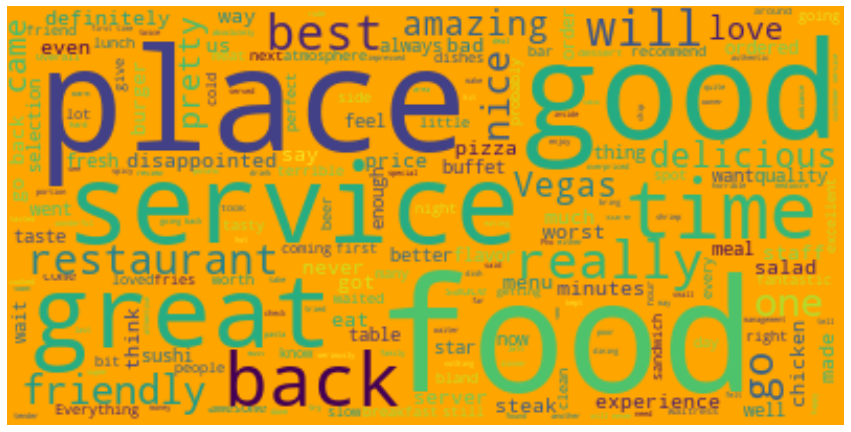

In [126]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud

os.chdir("/Users/JKovach/Downloads")
sen_raw = pd.read_csv('./sentiment labelled sentences/yelp_labelled.txt', delimiter='\t', header=None)
sen_raw.columns = ['message', 'positive']

# Using Wordcloud to determine negative keywords
wc = WordCloud(background_color='orange').generate(''.join(sen_raw['message']))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [127]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB

sen_raw['positive'] = (sen_raw['positive']==1)
data = None
target = None
bnb = None

def sentiment_model(df, kw_list):
    
    for key in kw_list:
        df[str(key)] = sen_raw.message.str.contains(
            " " + str(key) + " ",
            case=False
        )
    global data
    global target
    global bnb
    data = df[kw_list]
    target = sen_raw['positive']
    bnb = BernoulliNB()
    
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    print("Number of mislabeled points out of a total {} points: {}".format(
        data.shape[0],
        (target != y_pred).sum()
    ))

def cross_val(dat, tar, struc):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
    print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
    print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))
    print(str(cross_val_score(struc, dat, tar, cv=10)))
    
sen_raw.corr()

,positive
positive,1.0


In [133]:
# First iteration - original model
keywords1 = ['nasty', 'wait', 'bad', 'cold', 'never', 'disappointed', 'slow', 'worst']
sentiment_model(sen_raw, keywords1)
cross_val(data, target, bnb)

Number of mislabeled points out of a total 1000 points: 447
With 20% Holdout: 0.535
Testing on Sample: 0.553
[0.6  0.54 0.58 0.56 0.52 0.56 0.54 0.55 0.52 0.55]


In [129]:
# Second iteration
keywords2 = ['nasty', 'wait', 'bad', 'cold', 'never', 'disappointed', 'slow', 'worst', 'not', 'really']
sentiment_model(sen_raw, keywords2)
cross_val(data, target, bnb)

Number of mislabeled points out of a total 1000 points: 384
With 20% Holdout: 0.59
Testing on Sample: 0.616
[0.66 0.59 0.66 0.57 0.61 0.63 0.63 0.61 0.58 0.61]


In [130]:
# Third iteration
keywords3 = ['not']
sentiment_model(sen_raw, keywords3)
cross_val(data, target, bnb)

Number of mislabeled points out of a total 1000 points: 431
With 20% Holdout: 0.55
Testing on Sample: 0.569
[0.56 0.56 0.58 0.52 0.59 0.59 0.59 0.57 0.56 0.57]


In [131]:
# Fourth iteration
keywords4 = ['not', 'never']
sentiment_model(sen_raw, keywords4)
cross_val(data, target, bnb)

Number of mislabeled points out of a total 1000 points: 417
With 20% Holdout: 0.56
Testing on Sample: 0.583
[0.6  0.57 0.62 0.54 0.6  0.59 0.6  0.58 0.56 0.57]


In [132]:
# Fifth iteration
keywords5 = ['not', 'never', 'disappointed', 'slow', 'worst']
sentiment_model(sen_raw, keywords5)
cross_val(data, target, bnb)

Number of mislabeled points out of a total 1000 points: 397
With 20% Holdout: 0.58
Testing on Sample: 0.603
[0.63 0.59 0.65 0.56 0.6  0.61 0.62 0.61 0.57 0.59]
